# CALCULAR LA FRECUENCIA ABSOLUTA Y EL ANGULO RELATIVO

# Estudiante: Danny Michael Jaramillo Jumbo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#sep indica por que caracter se separa cada columna
#dtype damos el tipo de dato que sera cada valor es opcional
df = pd.read_csv('wine_dataset.csv', sep=',', quotechar='"',dtype={'Wine Type':'category'})

In [3]:
df.head(4) #presento las primeras 4 lineas 

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   

   OD280/OD315 of diluted wines  Proline Wine Type  
0                          3.92   1065.0       One  
1                          3.40   1050.0       One  
2                          3.17   1185.0       One  
3                          3.45   1480.0       One

In [4]:
df.info() #presenta las variables y los tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Alcohol                       178 non-null    float64 
 1   Malic acid                    178 non-null    float64 
 2   Ash                           178 non-null    float64 
 3   Alcalinity of ash             178 non-null    float64 
 4   Magnesium                     178 non-null    float64 
 5   Total phenols                 178 non-null    float64 
 6   Flavanoids                    178 non-null    float64 
 7   Nonflavanoid phenols          178 non-null    float64 
 8   Proanthocyanins               178 non-null    float64 
 9   Color intensity               178 non-null    float64 
 10  Hue                           178 non-null    float64 
 11  OD280/OD315 of diluted wines  178 non-null    float64 
 12  Proline                       178 non-null    floa

In [5]:
#Obtener la informaciond e la frecuencia  relativa como una serie de datos.calculo frequencia absoluta
x=df['Wine Type'].value_counts()

In [6]:
x

Two      71
One      59
Three    48
Name: Wine Type, dtype: int64

In [7]:
#Obtener informacion de la fercuencia absoluta y a la serie de datos la transforma a dataframe
#Wine Type  ES EL NOMBRE DE UNA COLUMNA
x=df['Wine Type'].value_counts().to_frame()  #dataframe
#frecuencia absoluta el numero de veces que se repite un valor

In [8]:
x

Wine Type
Two           71
One           59
Three         48

In [9]:
#sumo los valores de cada tipo de vino resulta 178
total=x['Wine Type'].sum()

In [10]:
total

178

In [11]:
#crear funcion para calcular frecuencia relativa

def freq_relative(x):
    return x/total

In [12]:
#para generar el angulo de acuerdo a la cantidad ( frecuencia porcentual)
def angulo(x):
    return freq_relative(x)*360

In [13]:
#calculo la frecuencia relativa
freq_relative(x['Wine Type'])

Two      0.398876
One      0.331461
Three    0.269663
Name: Wine Type, dtype: float64

In [14]:
x # aun no sale al lado la frecuencia relativa

Wine Type
Two           71
One           59
Three         48

In [15]:
#crea una nueva columna y le digo que valores debe poner en esa nueva columna
#origin el nombre de la columna
x=x.assign(freq_relative=freq_relative(x['Wine Type']))

In [16]:
x

Wine Type  freq_relative
Two           71       0.398876
One           59       0.331461
Three         48       0.269663

In [17]:
#crea una columna nueva para la funcionde angulo
x=x.assign(angulo=angulo(x['Wine Type']))

In [18]:
x  # ahora ya contengo la frecuecnia relativa y el angulo en base a las funciones 

Wine Type  freq_relative      angulo
Two           71       0.398876  143.595506
One           59       0.331461  119.325843
Three         48       0.269663   97.078652

In [19]:
x.describe()

Wine Type  freq_relative      angulo
count   3.000000       3.000000    3.000000
mean   59.333333       0.333333  120.000000
std    11.503623       0.064627   23.265754
min    48.000000       0.269663   97.078652
25%    53.500000       0.300562  108.202247
50%    59.000000       0.331461  119.325843
75%    65.000000       0.365169  131.460674
max    71.000000       0.398876  143.595506

In [20]:
#Para comprobar la informacion
x.sum()

Wine Type        178.0
freq_relative      1.0
angulo           360.0
dtype: float64

# REALIZAR UN PLOT LINEAL DE LA FRECUENCIA ENCONTRADA

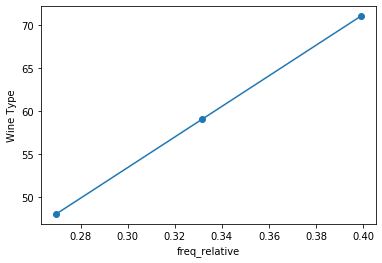

In [21]:
#declaramos variables para almacenar los valores de las columnas 
D=x['freq_relative'] #frecuencia relativa en la tabla X
J=x['Wine Type']     #frecuencia absoluta en la tabla X 

plt.xlabel("freq_relative")   # Establece el título del eje x
plt.ylabel("Wine Type")   # Establece el título del eje y
plt.plot(D,J, marker='o') # comando para que el punto exacto(x,y)


# REALIZAR UN PLOT DE CAJA DE BIGOTE DEL ALCOHOL PRESENTE EN LOS 3 TIPOS DE VINO VERIFICAR SI HAY VALORES ESTRAÑOS

In [22]:
#EXISTEN  SESGOS en el alcohol de tipo Two

#caja de gato
ax=sns.boxplot(x="Alcohol",y='Wine Type',data=df)
#MOSTRAR DISPERCION la carga
ax=sns.swarmplot(x="Alcohol",y='Wine Type',data=df,color="0.25")

# ENCONTRAR LA MEDIA Y LA DESVIACION ESTANDAR DE ALCOHOL Y ALCOLINIDAD

In [23]:
# extraer toda la columna # directamente traigo valores df.describe()
media_alcohol=df['Alcohol']


In [24]:
# calculo la media
media_alcohol.mean()

13.000617977528083

In [25]:
#calculo la desviacion
media_alcohol.std()

0.8118265380058577

In [26]:
# extraer toda la columna alcalinidad
media_ALCALINIDAD=df['Alcalinity of ash']


In [27]:
media_ALCALINIDAD.mean()

19.49494382022472

In [28]:
#calculo la desviacion 
media_ALCALINIDAD.std()

3.3395637671735052

# ENCONTRAR LA RELACION QUE EXISTE ENTRE EL ALCOHOL, INTENSIDAD DE COLOR DE VINO

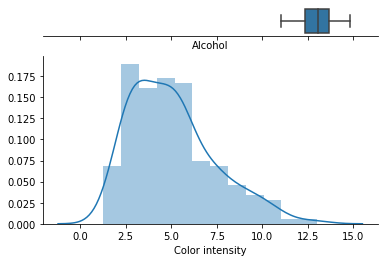

In [29]:
#para mostrar los datos comparativos entre el alcohol y el color de vino
f, (ax_box, ax_hist)=plt.subplots(2, sharex = True,
                                 gridspec_kw={"height_ratios":(.15,.85)})

#caja de gato
sns.boxplot(df['Alcohol'], ax=ax_box)

#para que grafique la campana de gaus
sns.distplot(df['Color intensity'], ax=ax_hist)

ax_box.set(yticks=[])
#grafica la informacion en el mismo marco
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
